In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.multioutput import MultiOutputClassifier,MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
fd = pd.read_csv('Fraud_check.csv')
fd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fd[fd.duplicated(keep =False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
fd.shape

(600, 6)

In [10]:
fd.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
fd.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [12]:
label_encoder = preprocessing.LabelEncoder()
fd['Undergrad'] = label_encoder.fit_transform(fd['Undergrad'])
fd['Marital.Status'] = label_encoder.fit_transform(fd['Marital.Status'])
fd['Urban'] = label_encoder.fit_transform(fd['Urban'])

In [13]:
fd

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [14]:
fd['Taxable.Income'] = (fd['Taxable.Income']>30000)*1

In [15]:
x = fd.drop(axis =1,columns='Taxable.Income')
y = fd[['Taxable.Income']]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


In [18]:
model = DecisionTreeClassifier(criterion='gini',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

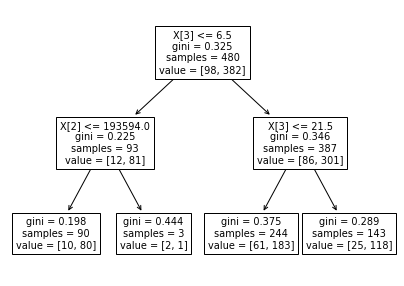

In [19]:
plt.figure(figsize=(7,5))
tree.plot_tree(model);

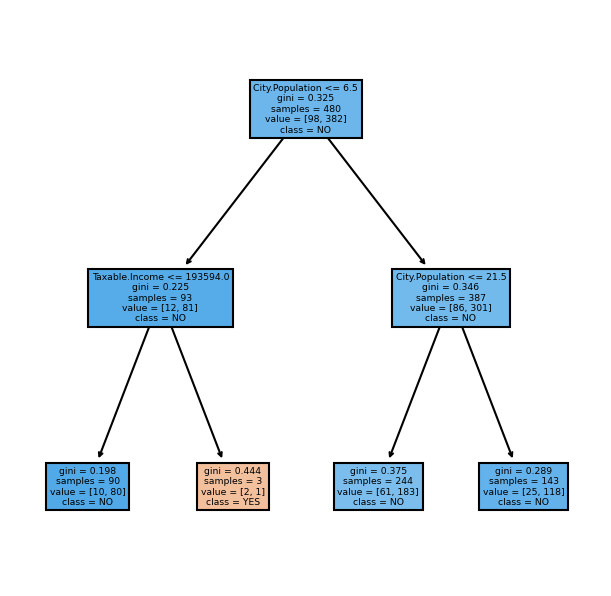

In [20]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience']
cn = ['YES','NO']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (5,5),dpi =150 )
tree.plot_tree(model,
              feature_names= fn,
              class_names= cn,
              filled= True);

In [21]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7979166666666667

In [22]:
model.score(x_test,y_test)

0.775

In [23]:
y_pred = model.predict(x_test)
y_pred
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.775


In [24]:
y_pred = model.predict(x_test)
print('Classification report - \n',classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [25]:
train_acc =[]
test_acc = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=20)
    model.fit(x_train,y_train)
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))

In [32]:
accuracies = pd.DataFrame({'max_depth': range(1,11),'train_acc':train_acc,'test_acc':test_acc})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.783333
6,7,0.810417,0.758333
7,8,0.818750,0.741667
8,9,0.831250,0.733333
9,10,0.845833,0.750000


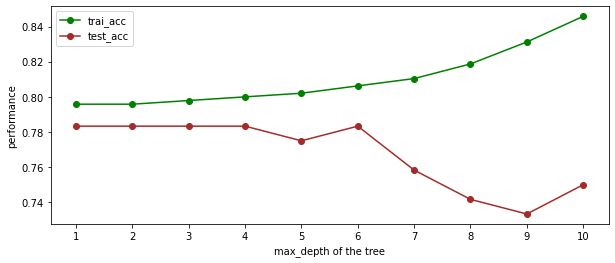

In [33]:
labels = ['trai_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(accuracies['max_depth'],accuracies['train_acc'],marker = 'o',color = 'green')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o',color='brown')
ax.set_xticks(np.arange(1,11))

plt.legend(labels)

plt.xlabel('max_depth of the tree')
plt.ylabel('performance');

### Insights Drawn:
>When the maximum depth of the decision tree is 1,2,3,4, the accuracy of the classsification algorithm gives 78.33%.Hence,it is clear that the Decision tree classfier gives a good result for the fraud check.